
# Investigating Movie Data Base

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I selected to analyse Movie database for this project. The database consist of around 10 000 movies with 21 atribute, such like year of release, genre, revenue, etc. 
I will try to answer questions, is budget, popularity or voting score has the biggest correlation with profit.
I will also compare profit for movies from different years. I will also do analysis of films profitability. 


In [120]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [121]:
# load data for the analysis
df= pd.read_csv('tmdb-movies.csv') 
# check the information in the table 
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning and preparation for data analysis


In [122]:

# drop homepage, tagline, keywords, production companies, cast and imdb_id as this will not be used in the analysis and there is a lot of missing columns

df.drop(['homepage', 'tagline' , 'keywords' , 'production_companies', 'cast', 'imdb_id'], axis=1 , inplace=True)
df.head()


,id,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [123]:
# drop rows with null values for clean data

df.dropna(inplace=True)
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10799.000000,10799.000000,1.079900e+04,1.079900e+04,10799.000000,10799.000000,10799.000000,10799.000000,1.079900e+04,1.079900e+04
mean,65572.805723,0.649527,1.471528e+07,4.006938e+07,102.198444,218.628392,5.970979,2001.288545,1.765878e+07,5.168201e+07
std,91760.367010,1.002472,3.098790e+07,1.173240e+08,30.769735,577.186073,0.932986,12.819732,3.438499e+07,1.450241e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10570.000000,0.209190,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20455.000000,0.385532,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74684.000000,0.717537,1.588747e+07,2.456967e+07,111.500000,147.000000,6.600000,2011.000000,2.103337e+07,3.409009e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [124]:

# Take out runtime, revenue and budget 0 to increase the quality of data 

df_a= df.query('budget >0 and runtime >0 and revenue > 0 ')
df_a.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39895.120135,1.191671,3.721040e+07,1.076840e+08,109.204463,527.745978,6.167955,2001.261546,4.424668e+07,1.370621e+08
std,67221.385992,1.475097,4.220503e+07,1.765408e+08,19.912258,879.943178,0.795121,11.282931,4.480521e+07,2.161130e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462724,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,105.500000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38578.000000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [125]:
df_a.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
overview           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [126]:
# Create additional metric profit_adj to analyze in further analysis

df_a['profit_adj'] = df_a['revenue_adj'] - df_a['budget_adj']
df_a.shape

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(3854, 16)

### Data Quality conclusion

After cleaning the data my dataset consist of 3855 with 16 columns


<a id='eda'></a>
## Exploratory Data Analysis




### How many movies were profitable segmented by years?

id                1073
popularity        1073
budget            1073
revenue           1073
original_title    1073
director          1073
overview          1073
runtime           1073
genres            1073
release_date      1073
vote_count        1073
vote_average      1073
release_year      1073
budget_adj        1073
revenue_adj       1073
profit_adj        1073
dtype: int64

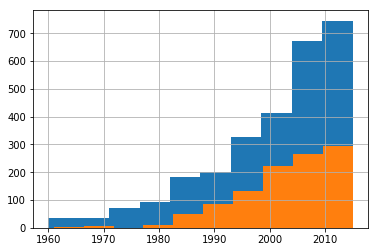

In [127]:
# Continue to explore the data to address your additional research

df_prof = df_a.query('profit_adj > 0')
df_notprof = df_a.query('profit_adj < 0')
df_prof['release_year'].hist()
df_notprof['release_year'].hist()

df_prof.count()
df_notprof.count()

### Number of films increase significantly during last years

The last graphic showed, that there were significantly more films created in last years, however not all of them were profitable. Total Number of profitable films were 2778 and 1073 not profitable movies

In [128]:
# Average profit by year, from biggest to lowest

df_mean=df_a.groupby('release_year').mean()
df_mean['profit_adj'].sort_values(ascending= False)


release_year
1965    5.526511e+08
1973    4.328721e+08
1975    3.638568e+08
1977    3.301075e+08
1967    3.199669e+08
1969    3.074121e+08
1972    2.980356e+08
1964    2.959526e+08
1970    2.318386e+08
1974    2.213122e+08
1961    2.181770e+08
1978    1.976323e+08
1979    1.784574e+08
1962    1.718493e+08
1976    1.607848e+08
1960    1.595481e+08
1982    1.574585e+08
1971    1.393045e+08
1963    1.369589e+08
1989    1.242996e+08
1968    1.172100e+08
1980    1.152827e+08
1992    1.135624e+08
1994    1.116238e+08
2015    1.094348e+08
1990    1.087903e+08
1983    1.062928e+08
1981    1.055405e+08
2012    9.976430e+07
1995    9.907411e+07
1991    9.760651e+07
1997    9.630338e+07
1993    9.593160e+07
2014    9.309273e+07
1984    9.163009e+07
2003    9.014710e+07
1987    8.963552e+07
2002    8.595209e+07
1985    8.241661e+07
2009    8.218418e+07
2013    8.207319e+07
2001    8.164507e+07
2004    7.713978e+07
1998    7.668696e+07
1996    7.656904e+07
1988    7.482564e+07
2007    7.448429e+07


### The most profitable years were in 60s and 70s.

This table shows, that the most profitable movies with adjusted budget and revenue were in 60s and 70s. 


### What has the biggest correlation with profit: budget, popularity or voting score

I will be using newly created column : profit_adj for my analysis, as profit is very important 


0.39439267932299377

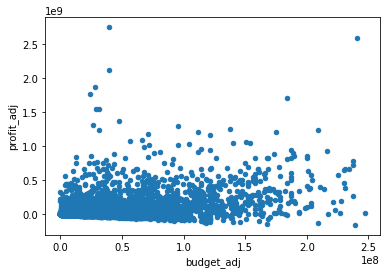

In [129]:
#  In order to find the biggest correlation I will create 3 differetn scatter points, one with budget, one with popularity 
# and one with voting

df_bud= df_a.query('budget_adj < 2.5e+08') # take out the outliers to have better picture

df_bud.plot(x='budget_adj', y='profit_adj', kind='scatter')
df_bud['profit_adj'].corr(df_a['budget_adj'])

0.5526802346633373

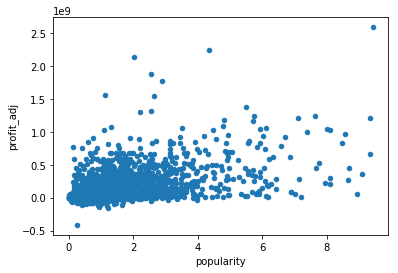

In [130]:
df_pop= df_a.query('popularity < 10') # take out the outliers to have better picture
df_pop.plot(x='popularity', y='profit_adj', kind='scatter')
df_pop['profit_adj'].corr(df_a['popularity'])

0.28868463106904735

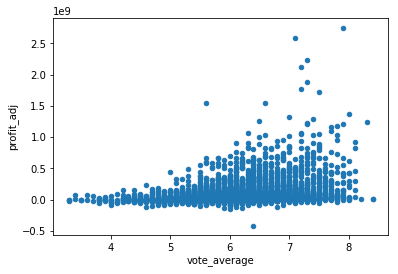

In [131]:
df_vot= df_a.query('vote_average > 3') # take out the outliers to have better picture

df_vot.plot(x='vote_average', y='profit_adj', kind='scatter')
df_vot['profit_adj'].corr(df_a['vote_average'])

### The biggest correlation with profitability has the popularity

From the analysis above, we can see, that the biggest positive correlation with profit has the popularity
. We can also see,that vote_average has really small correlation with profit

<a id='conclusions'></a>
## Conclusions

From analysis above I can conclude few things: 
1. There were more profitable movies during last 40 years, than not profitable
2. The most profitable years were in 60s and 70s. Top of the year was 1965
3. The biggest correlation with profit has popularity. 
4. Average vote result has almost no correlation with profit, which is quite interesting finding. 
